# BINA Leistungsnachweis
##Gruppe Francesca, Joris, Manuel & Ryan

***Step 0*** – Wie schneidet die Schweiz im Vergleich zu anderen Nationen im OECD Better Life Index ab und welche Faktoren beeinflussen das Ergebnis der Schweiz?  

Im Rahmen der Arbeit möchten wir untersuchen, wie die Schweiz im Vergleich zu anderen Ländern im OECD Better Life Index abschneidet.

Dabei wird untersucht, wo sich die Schweiz in den untersuchten Jahren positioniert hat und welche Faktoren ein vermeintlich besseres oder schlechteres Abschneiden zum Vorjahr respektive zu den anderen Ländern beeinflussen. Abschliessend können darauf mögliche Massnahmen definiert werden.



**Step 1** – Defining objectives and information needs:  

**Problemdefinition:**

Trotz des hohen Lebensstandards in der Schweiz und vielen Ländern der Europäischen Union (EU) variieren die Niveaus der Lebenszufriedenheit innerhalb dieser Regionen erheblich. Während finanzielle Sicherheit, Gesundheitsversorgung und Bildung oft als Kernindikatoren für Lebensqualität angesehen werden, gibt es eine Reihe weiterer Faktoren, die das Wohlbefinden und die Lebenszufriedenheit der Einwohner:innen beeinflussen können. Zu diesen Faktoren gehören soziale Beziehungen, Arbeitsbedingungen, Work-Life-Balance, Umweltqualität und persönliche Freiheiten. Es ist wichtig zu verstehen, welche Aspekte den grössten Einfluss auf die Lebenszufriedenheit haben, um politische und gesellschaftliche Massnahmen zu entwickeln, die das allgemeine Wohlbefinden fördern.

**Hypothesen:**


**Ziel der Untersuchung:**

Das Ziel ist es, zu verstehen, welche Faktoren die grösste Rolle in der Lebenszufriedenheit der Menschen in der Schweiz und der EU spielen und wie politische Massnahmen gestaltet werden können, um das Wohlbefinden zu verbessern. Es soll auch untersucht werden, welche Best Practices aus anderen Ländern übernommen werden können, um die Lebenszufriedenheit in der Schweiz weiter zu steigern.

**Vorgehen**

Benchmarking: Um die Positionierung und deren Entwicklung der Schweiz in ein Verhältnis zu setzen wird ein Benchmark erstellt. Daraus wird ersichtlich wo die Schweiz zum Zeitpunkt des Untersuchungsstart positioniert ist und wie sich die Positionierung im Laufe der Zeit verändert hat.

Untersuchung Benchmarking: Das erstellte Benchmarking wird anschliessend auf Auffälligkeiten untersucht. Jahre, in der die Schweiz vom Benchmark positiv sowie negativ auffällt, werden im Schritt drei genauer analysiert.

Auffälligkeiten untersuchen: Um herauszufinden, weshalb die Schweiz in einigen Jahren besser oder schlechter als der Benchmark abgeschnitten hat, werden die Daten des Bundesamtes für Statistik (BFS) im Zusammenhang mit der Zufriedenheit der Schweiz untersucht. Dabei werden die Jahre des auffälligen Abschneidens sowie die hervorgehenden Jahre berücksichtigt.

**What are our strategic aims?**

Welche Faktoren führten zu besonders guten oder schlechten Ergebnissen im OECD Better Life Index und was kann politisch sowie gesellschaftilch unternommen werden, um die Lebensqualität der Schweizer:innen zu erhöhen?

**What do we need to know and what questions need to be anwesered?**

Wie verändert sich die subjektive Wahrnehmung der Lebensqualität während des Untersuchungszeitraum in der Schweiz sowie den Teilnehmenden des OECD Better Life Indexes?

**Wie steht die Schweiz da im internationalen Vergleich (EU-Länder)?**

**Welche Faktoren waren ausschlaggebend für auffällige Resultate?**



**Who needs the information (leadership or business units)?**

Business Unit Level: Stadtplanung Behörde / Politik
Die Daten werden verwendet, um die städtische Entwicklung und Infrastrukturprojekte zu leiten, mi dem Ziel, die Lebensqualität zu verbessern.  

**What decision needs to be taken?**


**Step 2 – Collecting Data**

OECD Better Life Index-Daten

BFS-Daten  

Gathering and organising the right data. Emphasis on finding meaningful and relevant data to meet the information needs identified in Step 1. Organisations need to either:

Assess whether the required data is already held somewhere in the organisation

Identify the best way to collect the data

**2.1 Supporting internal data with external data > provide internal & external**

**2.2 Balancing structured data (excel) with unstructured data (website, social media, video content)**

**2.3 Identifying data collection formats (activity data, conversation data, photo and video data, sensor data)**

In [258]:
import pandas as pd
import tempfile
import os
import numpy as np

csv_url = 'https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/oecd_data_2007bis2022.csv'
#csv_url = 'https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/ryan_test.csv'
df = pd.read_csv(csv_url, delimiter=';')

# using unique measurements (e.g. 1_1, 1_2 etc.)
raw_categories = df['MEASURE'].unique()
categories = [x for x in raw_categories if str(x) != 'nan'] #removed coutnry "nan" from list

# reverse ranking means that a measurement with a small value has a higher ranking than one with a large value
categories_reverse_ranking = ["1_2", "2_8_DEP", "2_8_VER", "11_1_VER", "11_1_DEP","11_2",
                              "2_4","7_3_VER", "7_3_DEP", "4_4_VER", "4_4_DEP",
                              "2_5", "3_1", "3_3", "3_4", "2_3", "1_4","1_5",
                              "1_6", "9_2", "5_2_DEP", "5_3", "5_4", "7_1_DEP",
                              "8_1_DEP", "10_1", "10_2_DEP", "10_3","2_2", "2_7"] #TODO: List fertig machen! Alle durchgehen

irrelevant_categories = ["4_1", "4_2", "4_3", "6_1_DEP", "6_1_VER", "6_2_DEP",
                         "6_2_VER", "6_3_DEP", "6_3_VER", "6_4", "6_4_DEP",
                         "6_4_VER", "6_5", "6_5_DEP", "6_5_VER", "7_2", "8_1",
                         "1_3", "1_3_VER", "1_6","2_6", "5_4", "8_1_DEP"]

category_rules = {}
all_category_rankings = []

temp_dir = tempfile.mkdtemp()

for category in categories:
  category_df = df[df['MEASURE'] == category]
  if category in irrelevant_categories:
    continue
  #-----STEP 0 -------------------------------------------------------------
  # write temp. files for eventual checks
  temp_file_path = os.path.join(temp_dir, f'{category}.csv')
  category_df.to_csv(temp_file_path, index=False)
  #print(f"Data for category {category} written to {temp_file_path}")
  #------------------------------------------------------------------

  #-----STEP 1 -------------------------------------------------------------
  # collect data and transform to correct rating
  country_means = {}
  countries = category_df['Reference area'].unique()
  # collect means of each country per measurement
  for country in countries:
    country_df = category_df.loc[df['Reference area'] == country]
    try:
      avg_value = country_df['OBS_VALUE'].mean()
    except Exception as e:
      print("Error while calculating mean for {} and {}".format(country, category))
      raise

    country_means[country] = avg_value

  #-----STEP 2 -------------------------------------------------------------
  # calculate ranking with min & max value
  average_values = list(country_means.values())
  # get min and max per measurement
  min_value = np.nanmin(average_values)
  max_value = np.nanmax(average_values)
  category_rules[category] = {'min': min_value, 'max': max_value}

  min = category_rules[category]["min"]
  max = category_rules[category]["max"]

  #print("------------{}-----------".format(category))

  measurement_ranking = []
  if category in categories_reverse_ranking:
    for key, value in country_means.items():
        #print(key)
        #print("Value: {}".format(value))
        #print("Min: {}".format(min))
        #print("Max: {}".format(max))
        ranking = (value-max)/(min-max)*9+1
        measurement_ranking.append({key:ranking})
        #print("Ranking: {}".format(ranking))
        #print("----")
  else:
    #print("---- KATEGORIE: {}".format(category))
    for key, value in country_means.items():
        #print(key)
        #print("Value: {}".format(value))
        #print("Max: {}".format(max))
        #print("Min: {}".format(min))
        ranking = (value-min)/(max-min)*9+1
        measurement_ranking.append({key:ranking})
        #print("Ranking: {}".format(ranking))
        #print("----")
  #print(category)
  #print(measurement_ranking)

  all_category_rankings.append({category:measurement_ranking})

all_category_rankings_sorted = sorted(all_category_rankings, key=lambda x: list(x.keys()))
for ranking in all_category_rankings_sorted:
  print(ranking)


{'10_1': [{'Austria': 9.66620879120879}, {'Spain': 9.418956043956044}, {'Netherlands': 9.233516483516484}, {'Slovak Republic': 9.015934065934065}, {'Finland': 7.8303571428571415}, {'Belgium': 8.580357142857142}, {'Poland': 8.971999154691463}, {'Portugal': 8.868818681318682}, {'Luxembourg': 9.291525781910396}, {'Slovenia': 9.307692307692307}, {'Sweden': 8.969780219780219}, {'Ireland': 9.27554945054945}, {'Greece': 8.545963651732881}, {'Switzerland': 9.704247675401522}, {'France': 9.549325674325674}, {'Israel': 7.36675824175824}, {'Denmark': 9.402472527472527}, {'United Kingdom': 10.0}, {'Latvia': 1.0}, {'Lithuania': 2.86675824175824}, {'Iceland': 9.611052409129332}, {'Germany': 9.740384615384615}, {'Türkiye': 7.998626373626372}, {'Czechia': 9.282967032967033}, {'Estonia': 3.657967032967031}, {'Hungary': 8.319632290786137}, {'Norway': 9.154395604395605}, {'Italy': 9.329045954045954}]}
{'10_2': [{'Slovak Republic': 3.8901420423878235}, {'Austria': 8.091275695626026}, {'Netherlands': 7.772

In [259]:
# category range is 1 to 11
all_results = {}
for i in range(1, 12):
  category_country_result = {}
  def add_to_dict(key, value):
      if key not in category_country_result:
          category_country_result[key] = [value]
      else:
          category_country_result[key].append(value)

  for item in all_category_rankings_sorted:
    for key in item.keys():
      if key.startswith("{}_".format(i)):
        item[key]
        for idx, ele in enumerate(item[key]):
          for key, value in ele.items():
            add_to_dict(key, value)

  result = []
  #print("+++++++++++++++++++++++ {} ++++++++++++++++++++++".format(i))
  for key, value in category_country_result.items():
    #print(key)
    #print(value)
    #print("---")
    mean = np.mean(value)
    result.append({key:mean})

  all_results[i] = result

all_results_list = [all_results]

for key, value in all_results.items():
  print("Kategorie: {}".format(key))
  print(value)
  print("---")

Kategorie: 1
[{'Germany': 8.026508968788846}, {'Belgium': 8.14168377474946}, {'Poland': 5.954819231219609}, {'Latvia': 3.049732915280879}, {'Finland': 8.615457288498524}, {'Netherlands': 8.012413127978999}, {'France': 7.690764321371833}, {'Switzerland': 8.165958457260638}, {'Ireland': 6.7754504511495695}, {'Estonia': 4.680007309726992}, {'Norway': 8.677543596618062}, {'Italy': 5.13815316878166}, {'Hungary': 5.891186404792151}, {'Spain': 4.600737325511579}, {'Czechia': 7.612572551520042}, {'Denmark': 8.698202415330794}, {'Austria': 8.015921228181458}, {'United Kingdom': 6.042660560470188}, {'Slovak Republic': 6.720010603247958}, {'Lithuania': 4.155325876806701}, {'Greece': 3.2337373682702513}, {'Luxembourg': 8.148430994693737}, {'Portugal': 4.906335167286509}, {'Slovenia': 7.094269794759826}, {'Sweden': 8.10401113760906}, {'Iceland': 9.315060348969627}, {'Israel': 4.043087069254503}, {'Türkiye': 2.5744470234460484}]
---
Kategorie: 2
[{'Greece': 4.651689170875888}, {'Norway': 9.202923759

Hier definiere ich eine Art "Clustering" nach Europäischen Regionen. Hierfür trage ich die Länder in die jeweiligen Cluster ein.

In [260]:
switzerland = ['Switzerland']
northern_countries = ['Norway','Finland','Denmark','Sweden','Iceland']
southern_countries = ['Italy','Spain','Portugal']
western_countries = ['Netherlands','France','Belgium','Ireland','United Kingdom','Luxembourg','Austria','Germany']
eastern_countries = ['Greece','Israel','Türkiye','Czechia','Hungary','Poland','Slovenia','Slovak Republic','Latvia','Estonia','Lithuania']

def get_color_legends():
  return "Switzerland: red\nNothern countries: green\nSouthern countries: orange\nMiddle countries: blue\nWestern countries: purple\nEastern countries: grey"

def get_country_color(country):
  if country in switzerland:
    return 'red'
  elif country in northern_countries:
    return "green"
  elif country in southern_countries:
    return "orange"
  elif country in western_countries:
    return "blue"
  elif country in eastern_countries:
    return "grey"
  else:
    return "black"

Auf Basis der zusammengefassten Werte pro Kategorie können wir Grafiken pro Kategorie erstellen:

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


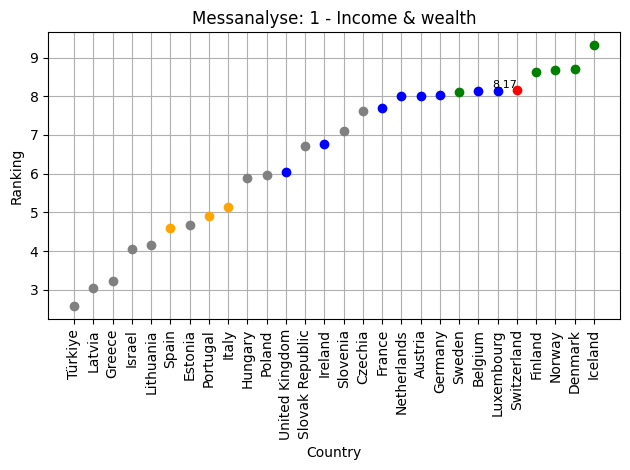


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


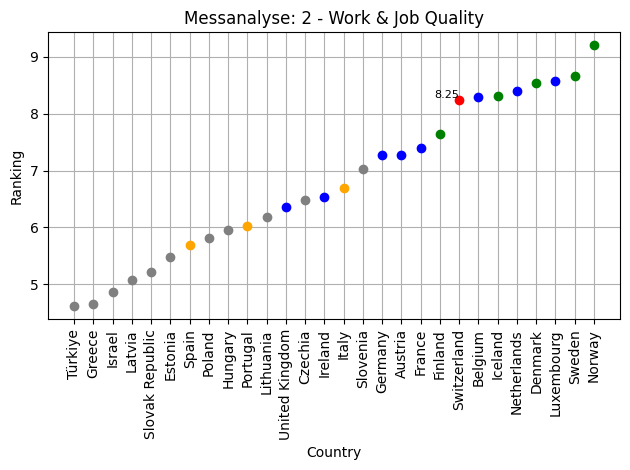


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


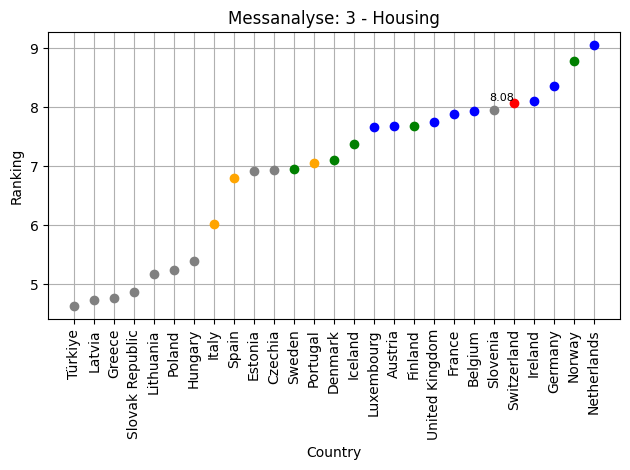


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


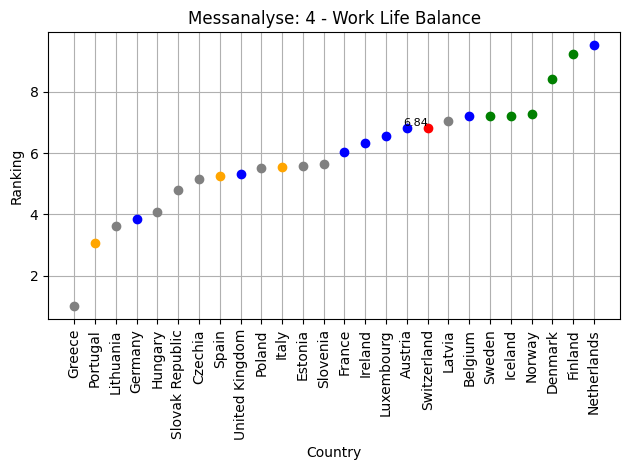


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


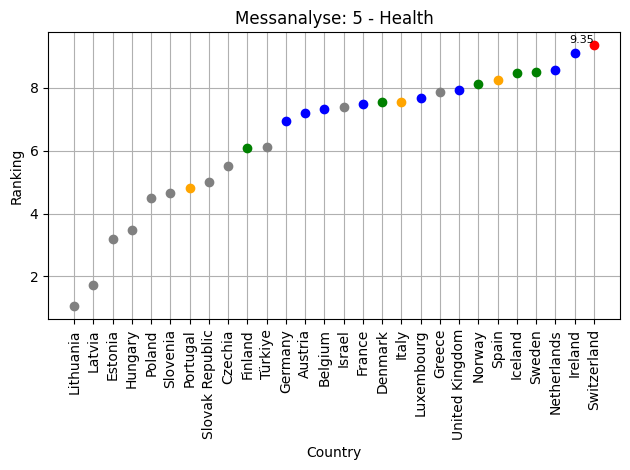


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


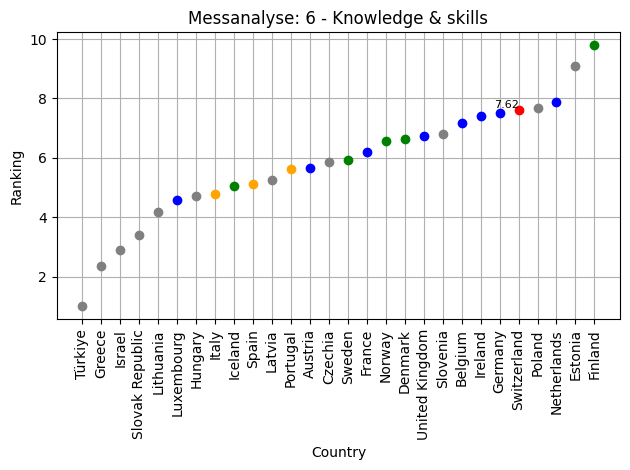


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


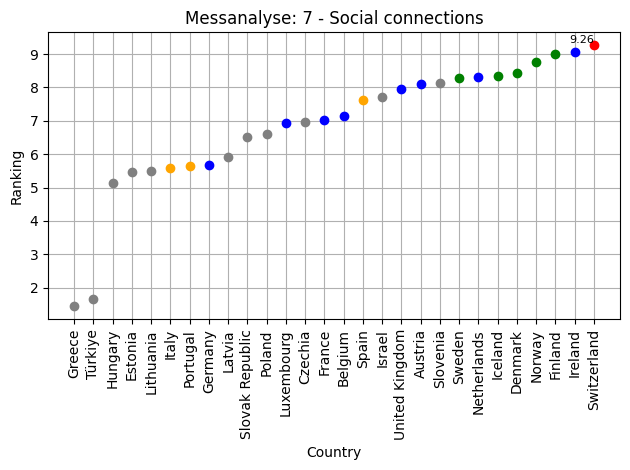


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


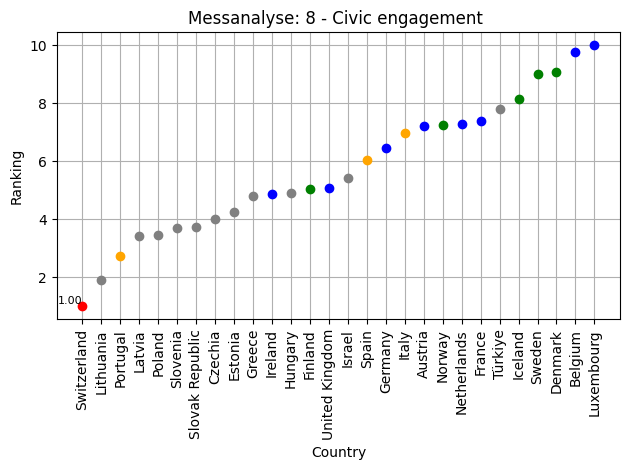


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


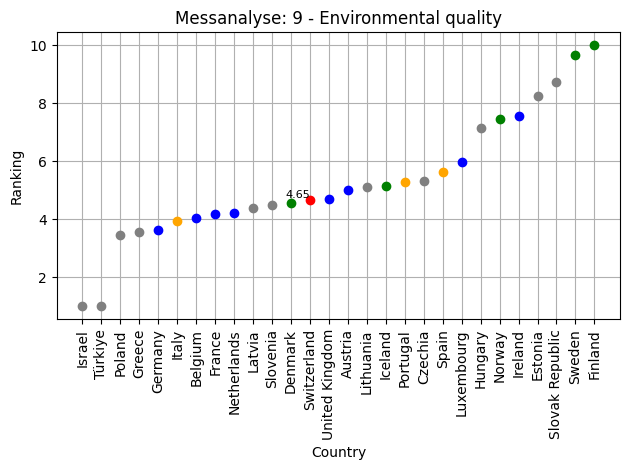


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


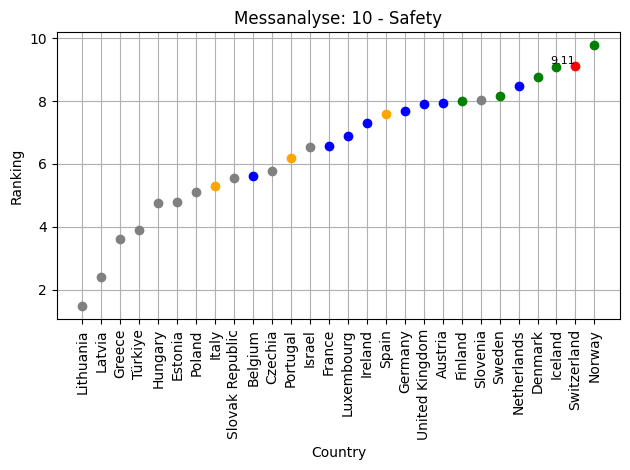


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


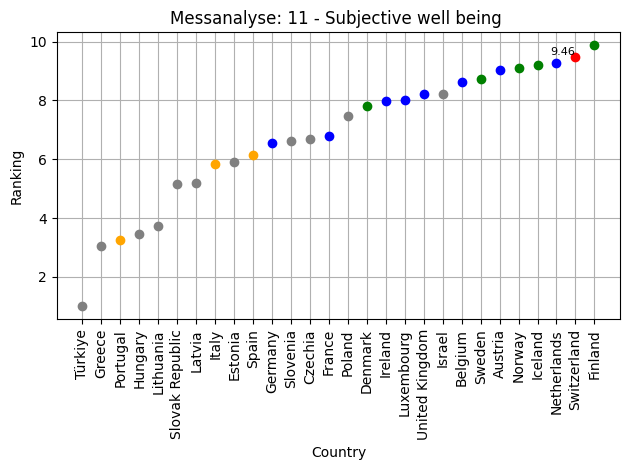

In [261]:
import matplotlib.pyplot as plt

cat_names = {
    "1":"Income & wealth",
    "2":"Work & Job Quality",
    "3":"Housing",
    "4":"Work Life Balance​",
    "5":"Health",
    "6":"Knowledge & skills",
    "7":"Social connections​",
    "8":"Civic engagement ​",
    "9":"Environmental quality​",
    "10":"Safety",
    "11":"Subjective well being "
}

for cat, country_rankings in all_results.items():
  countries = []
  rankings = []
  for ranking in country_rankings:
    country = list(ranking.keys())[0]
    rank = ranking[country]
    countries.append(country)
    rankings.append(rank)
  # Sort rankings and corresponding countries
  sorted_data = sorted(zip(rankings, countries), reverse=True)

  sorted_rankings, sorted_countries = zip(*sorted_data)

  #Plot the line plot with markers
  for i, (country, rank) in enumerate(zip(sorted_countries, sorted_rankings)):
      country_color = get_country_color(country)
      if country == 'Switzerland':
          plt.plot(country, rank, marker='o', color='red', label=country)
          plt.text(country, rank, f'{rank:.2f}', ha='right', va='bottom', fontsize=8)
      else:
          plt.plot(country, rank, marker='o', color=country_color, label=country)

  print("---Color codes---")
  print(get_color_legends())
  plt.xlabel('Country')
  plt.ylabel('Ranking')
  plt.title('Messanalyse: {} - {}'.format(cat, cat_names.get(str(cat))))
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.gca().invert_xaxis()
  plt.tight_layout()
  plt.show()
  print("")


These Graphs give an overview over the different rankings per category.
***This is only optional if one needs to see more details per category. If you want to see the graphs just change "show" on the first code-line to "False" -> then the plots will apear!***

In [281]:
show = True

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


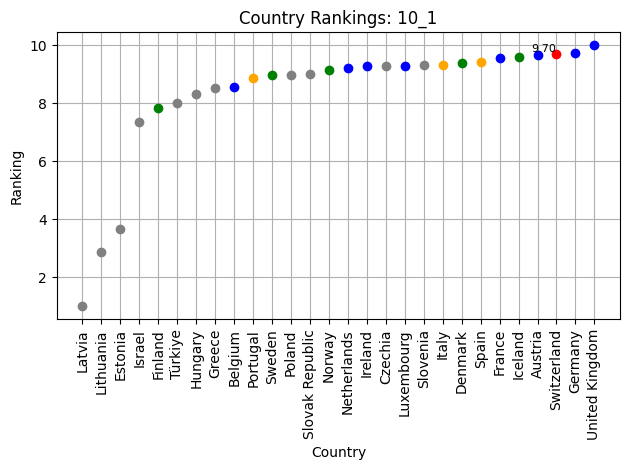

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


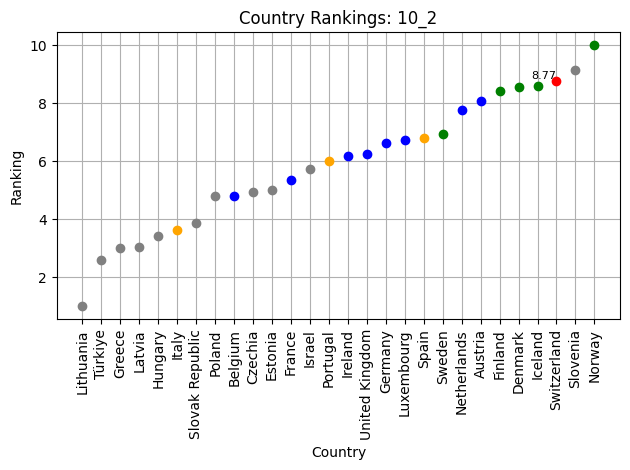

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


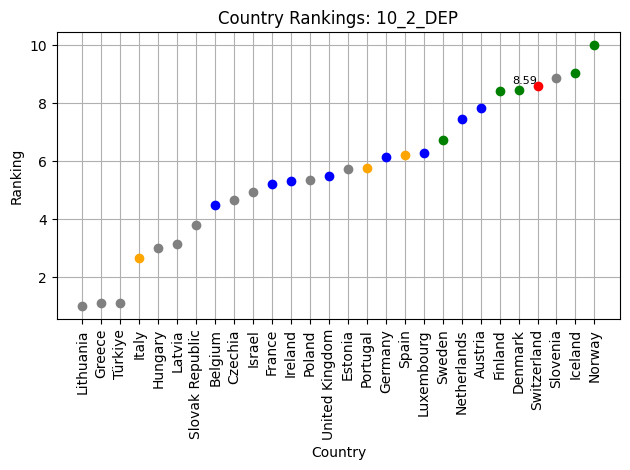

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


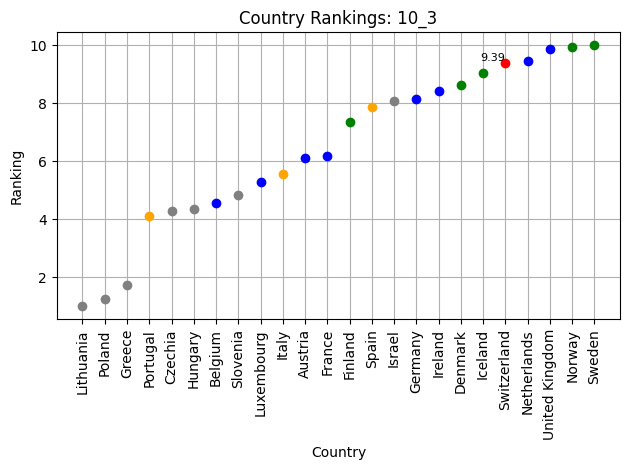

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


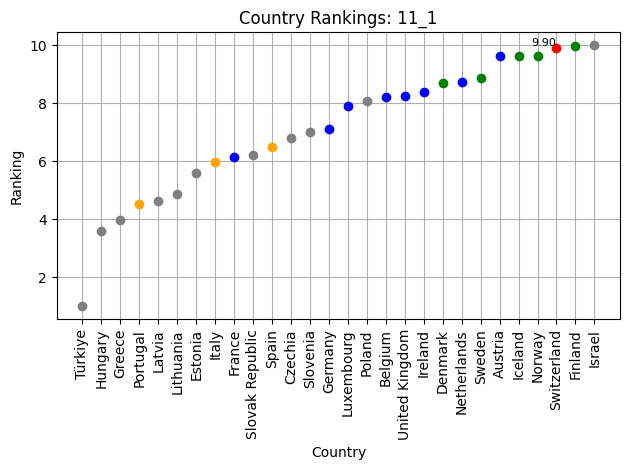

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


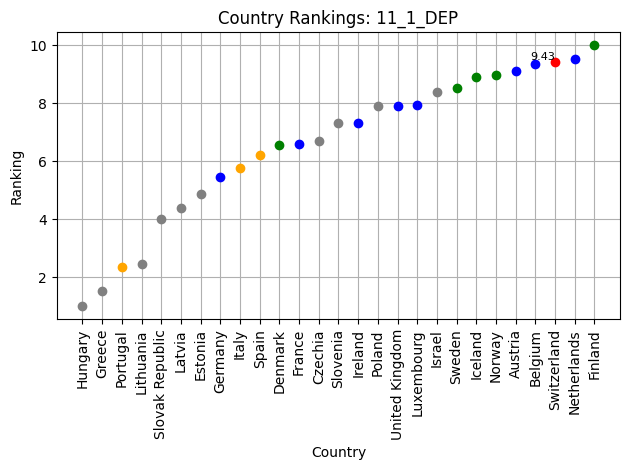

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


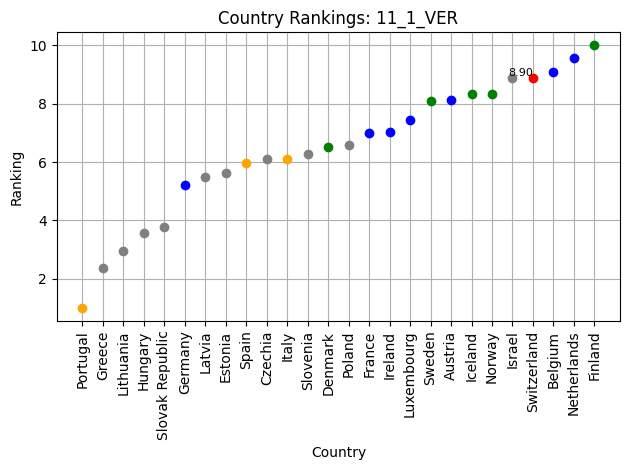

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


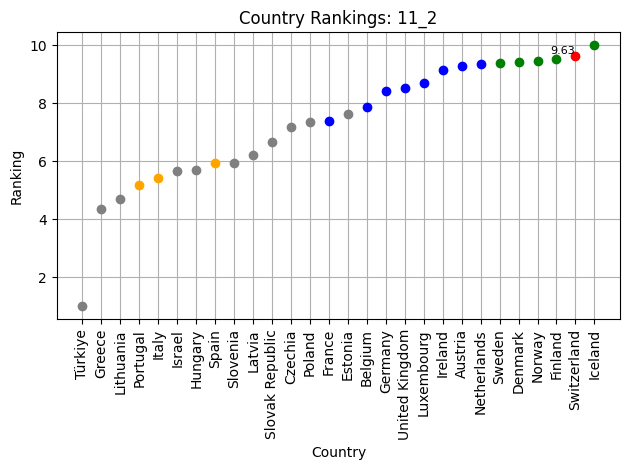

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


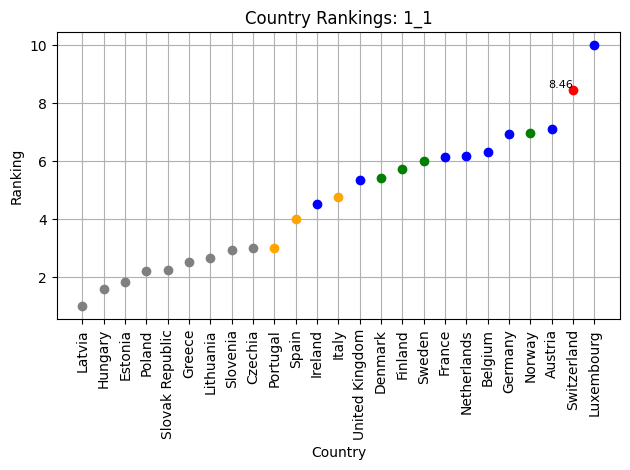

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


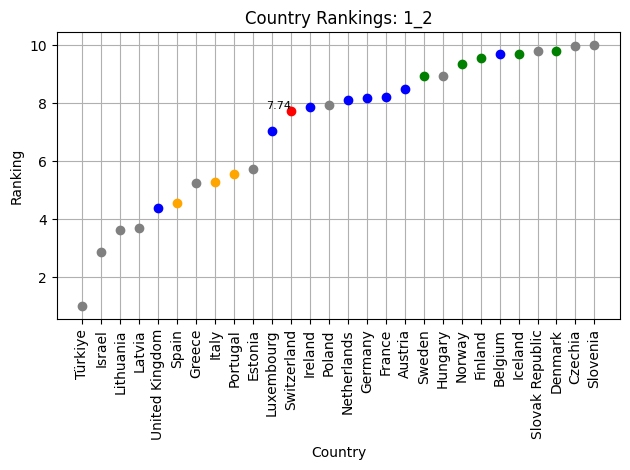

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


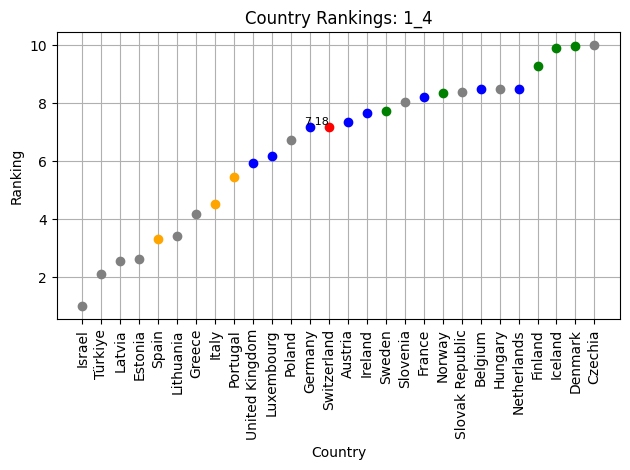

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


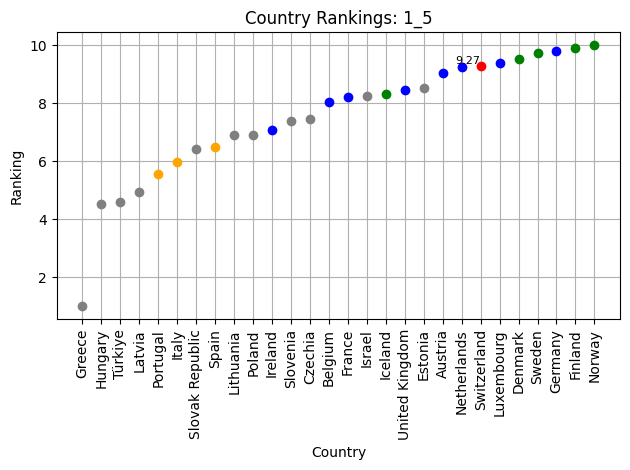

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


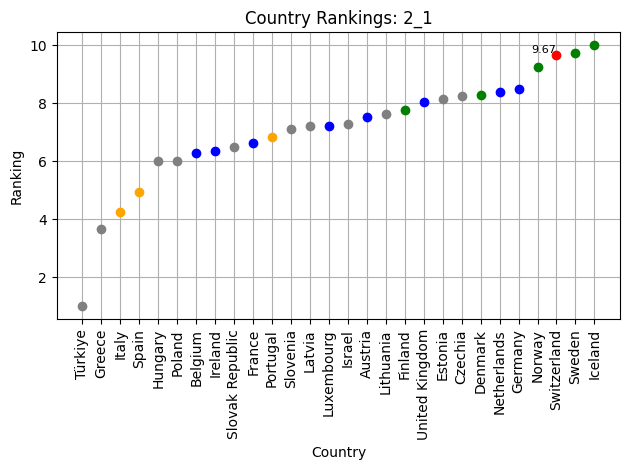

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


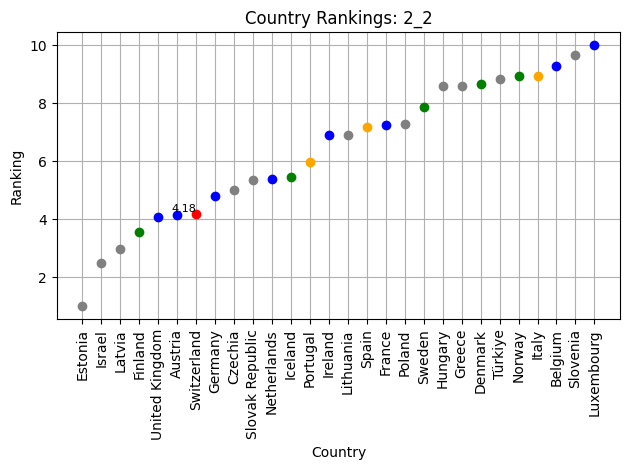

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


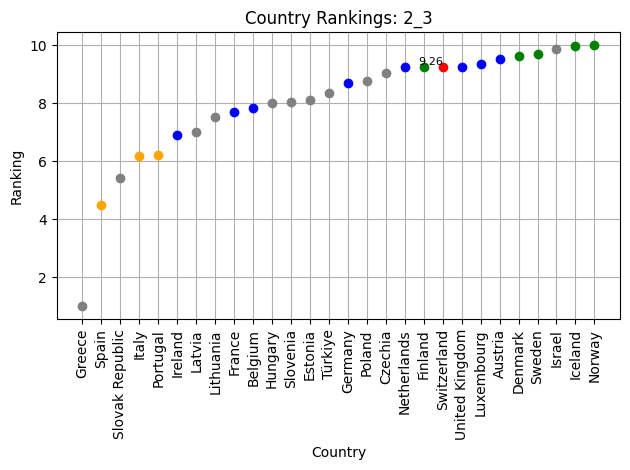

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


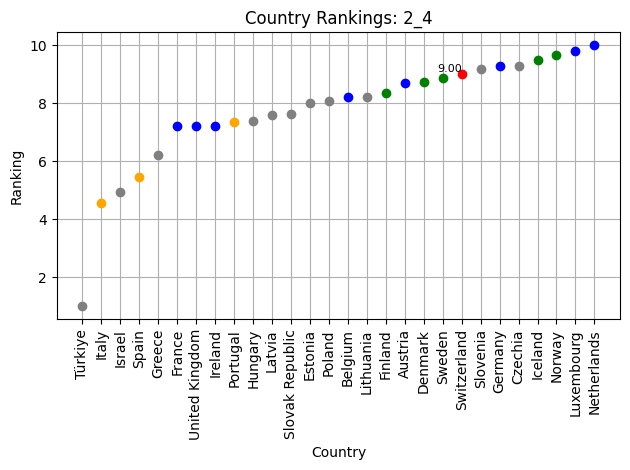

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


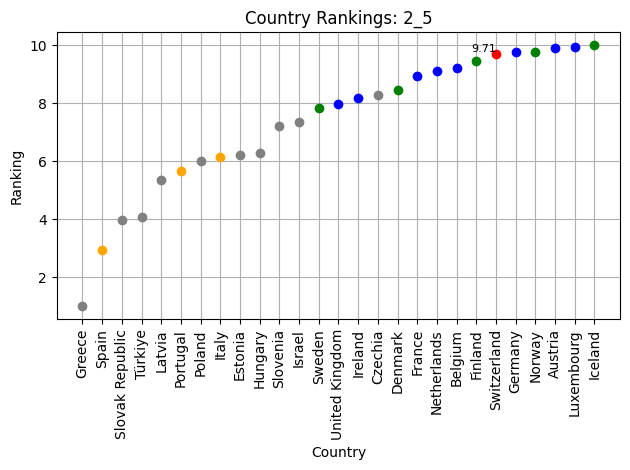

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


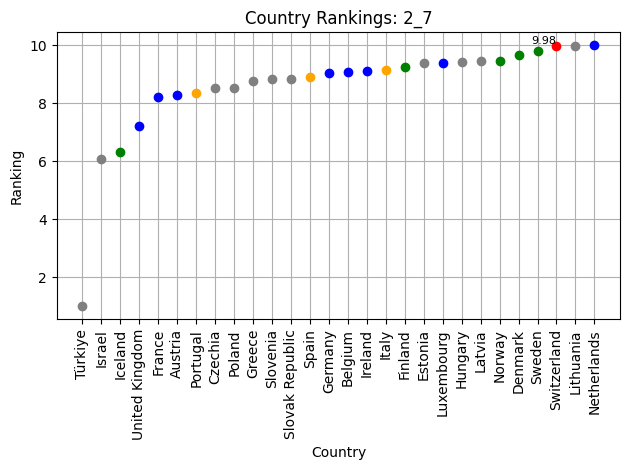

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


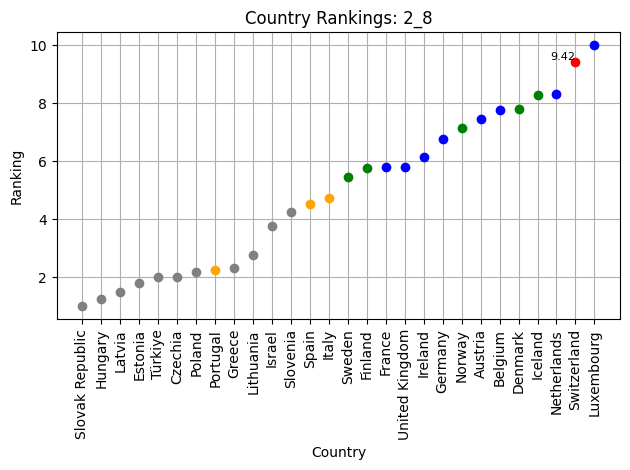

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


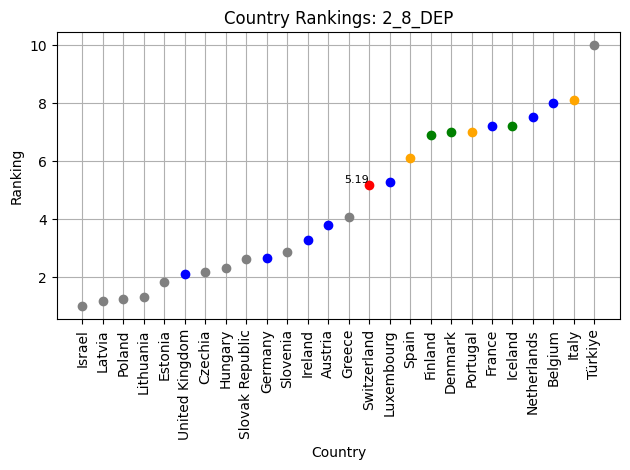

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


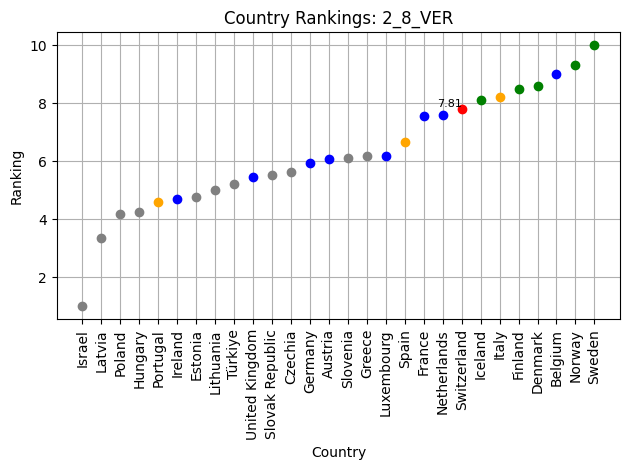

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


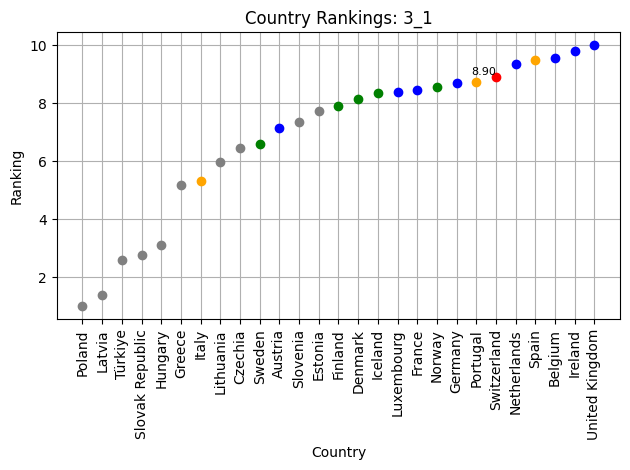

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


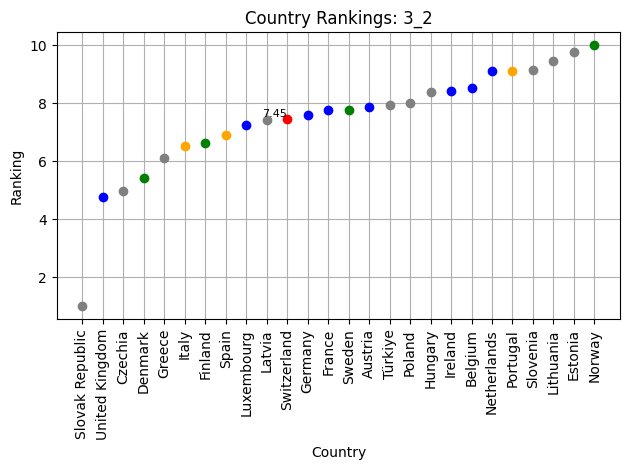

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


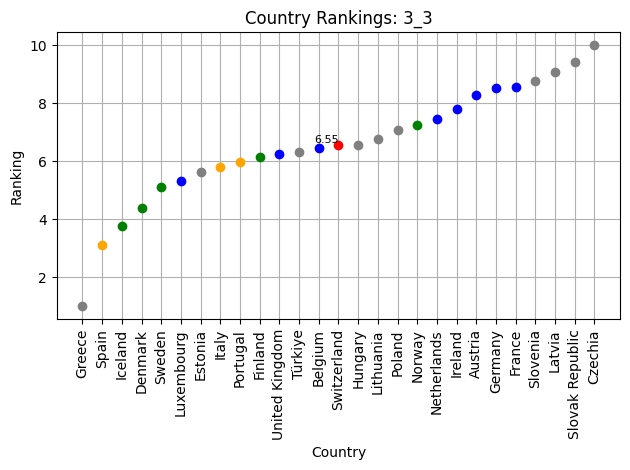

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


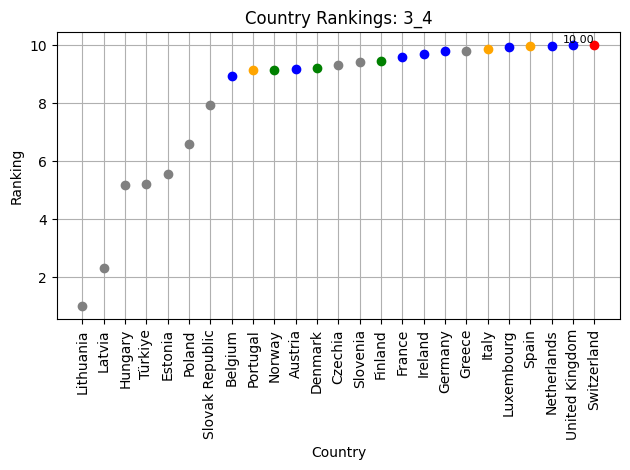

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


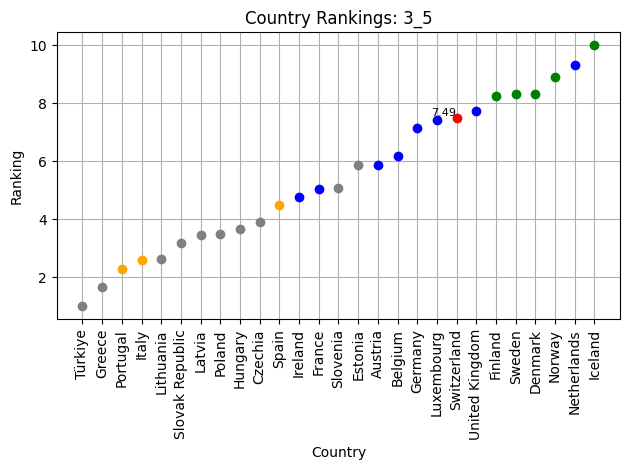

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


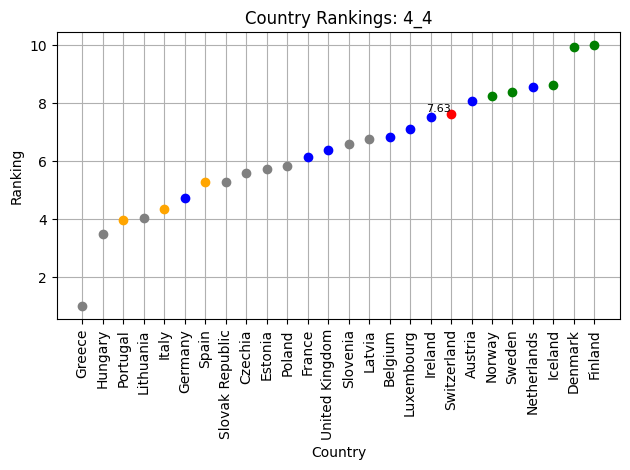

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


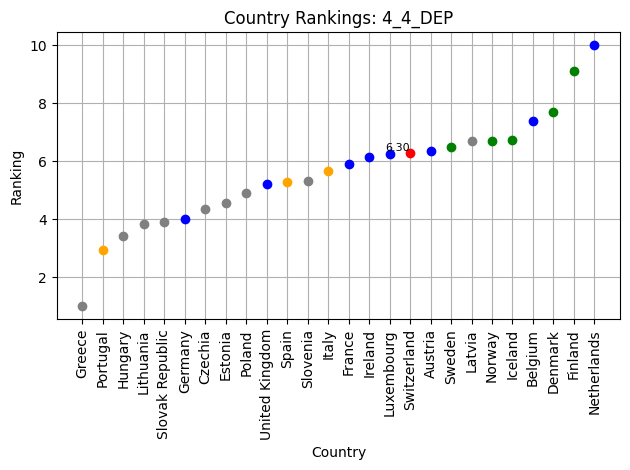

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


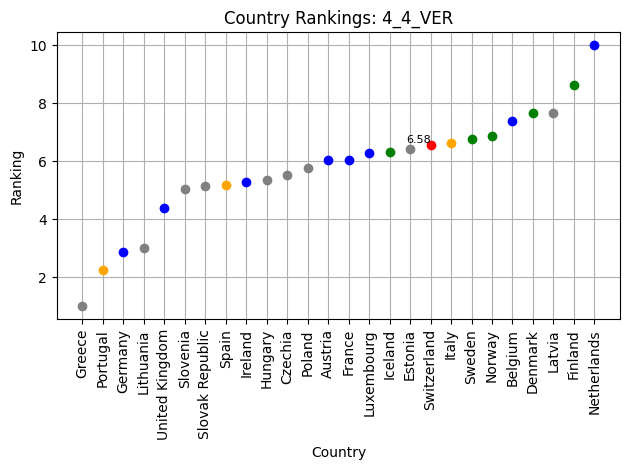

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


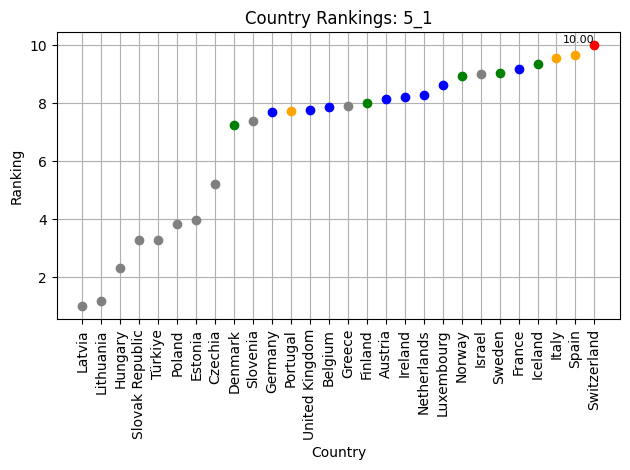

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


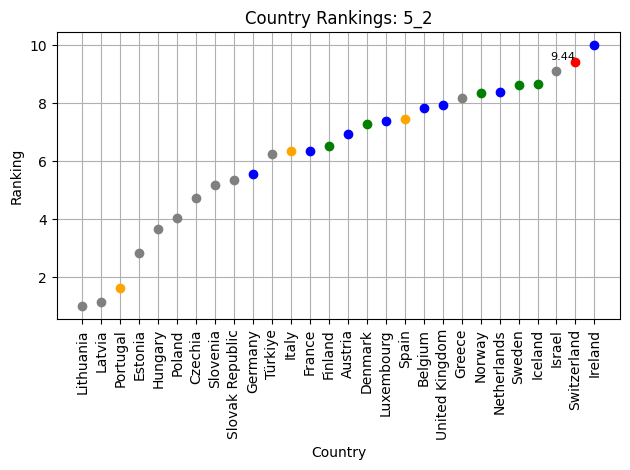

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


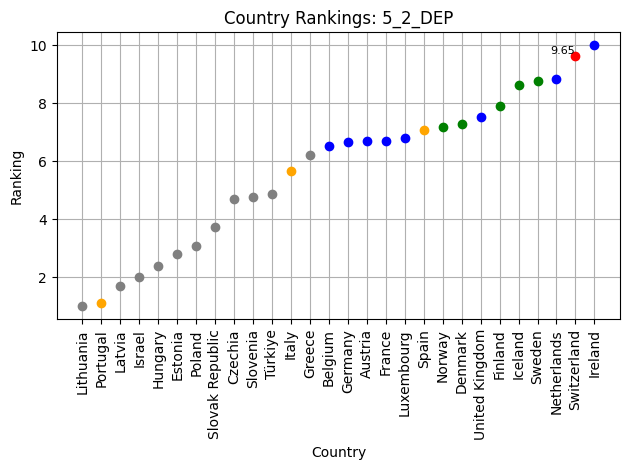

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


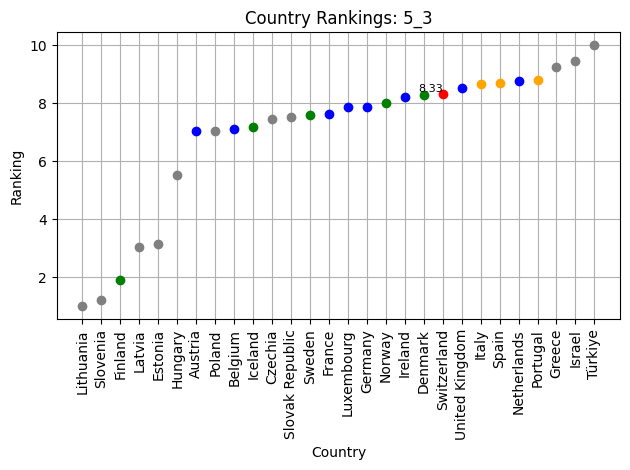

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


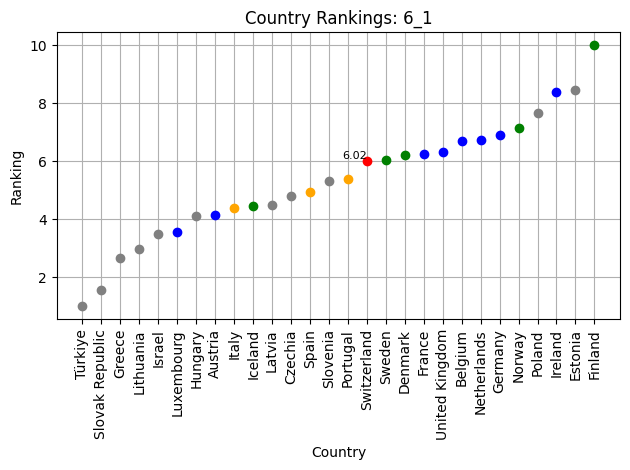

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


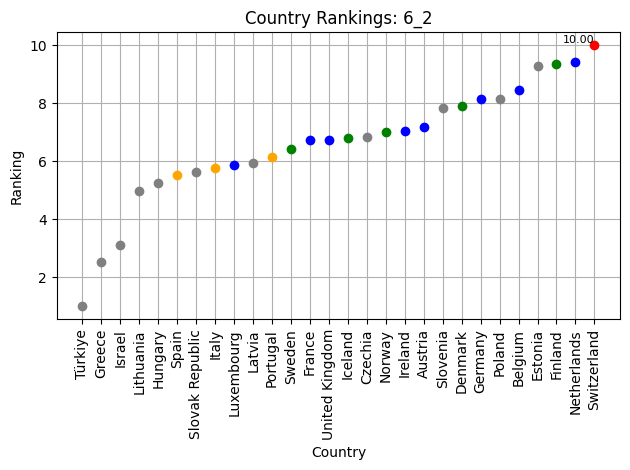

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


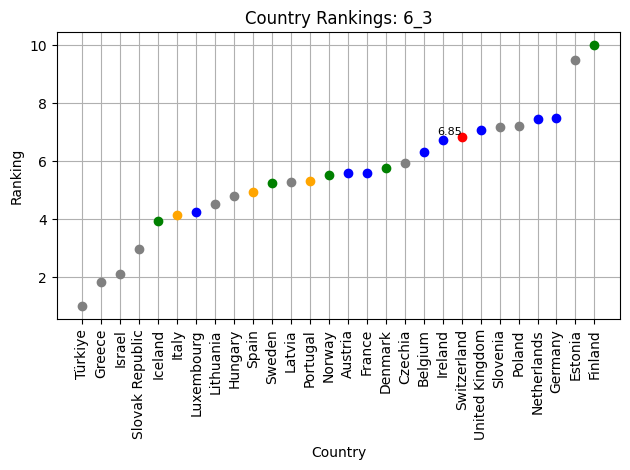

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


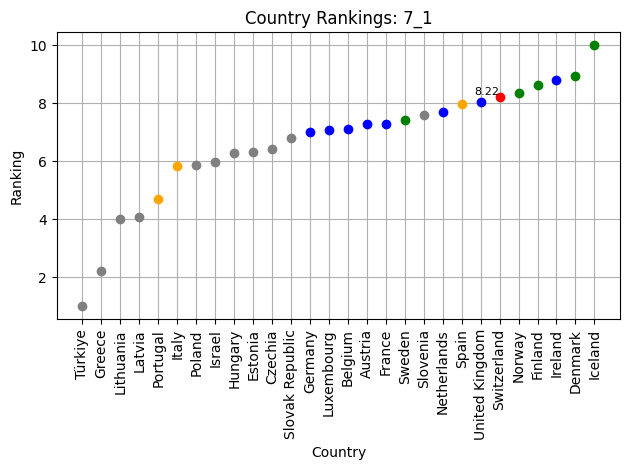

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


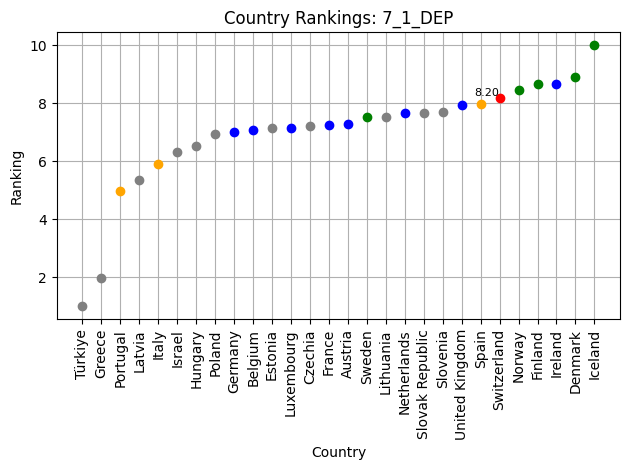

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


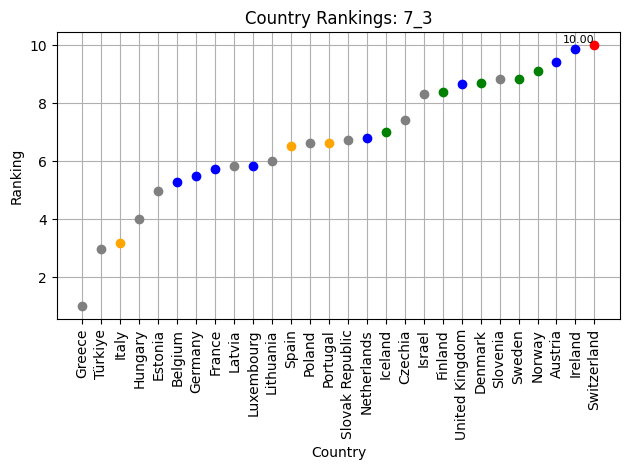

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


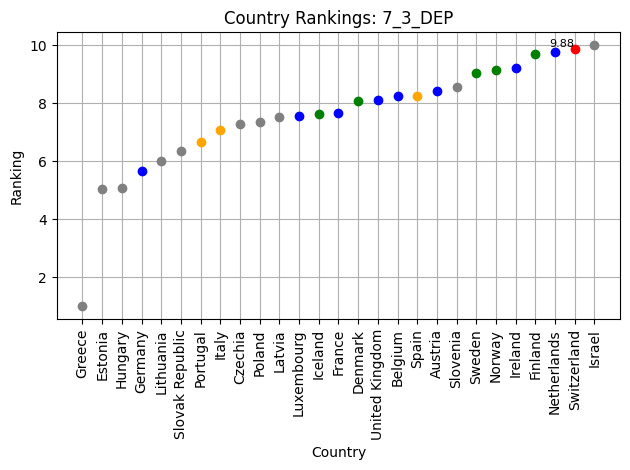

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


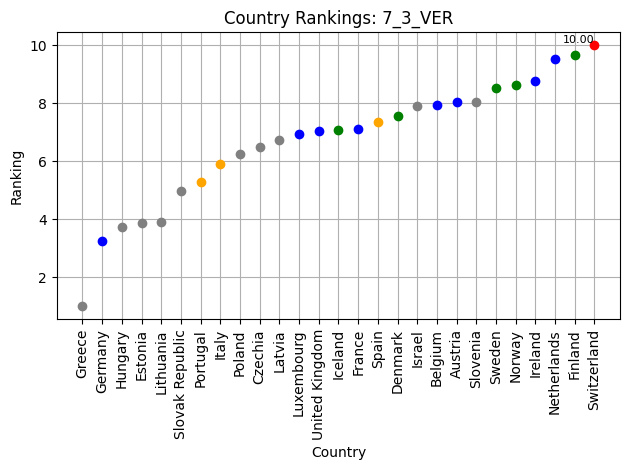

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


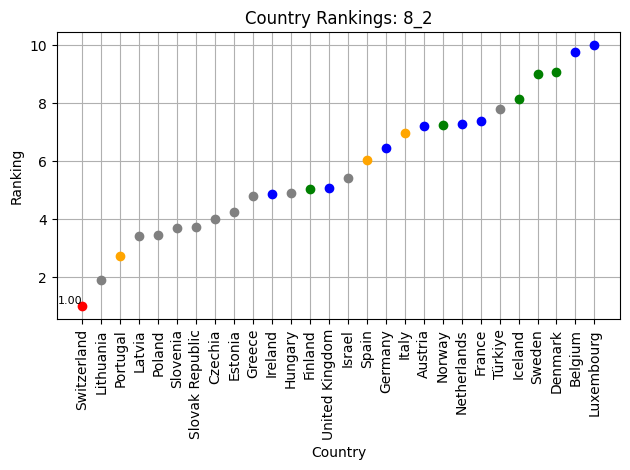

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


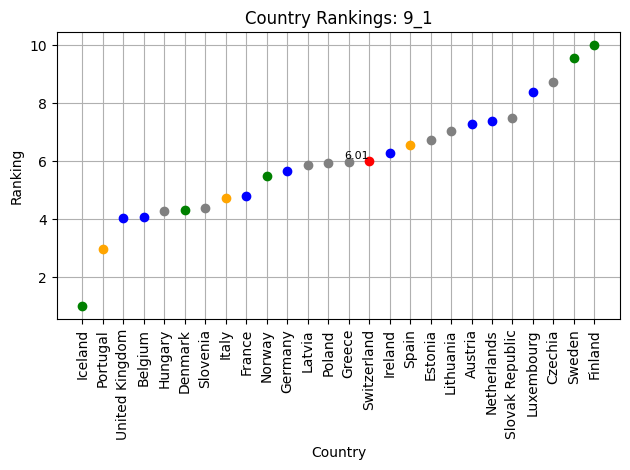

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


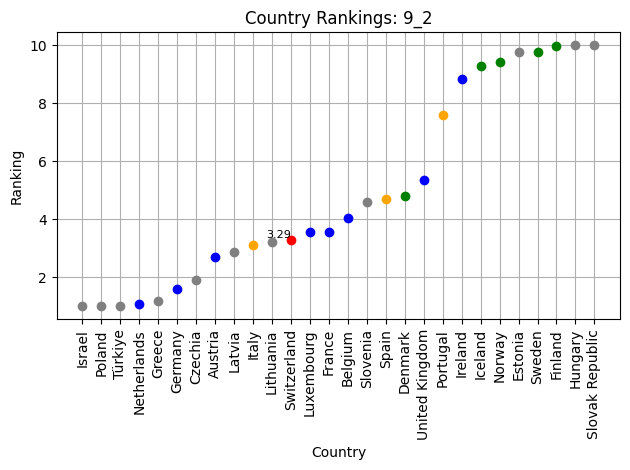

In [282]:
import matplotlib.pyplot as plt

if show:
  for idx, data in enumerate(all_category_rankings_sorted):
      for key, value in data.items():
          countries = []
          rankings = []

          for entry in value:
              country = list(entry.keys())[0]
              rank = entry[country]
              countries.append(country)
              rankings.append(rank)

          # Sort rankings and corresponding countries
          sorted_data = sorted(zip(rankings, countries), reverse=True)

          sorted_rankings, sorted_countries = zip(*sorted_data)

          #Plot the line plot with markers
          for i, (country, rank) in enumerate(zip(sorted_countries, sorted_rankings)):
              country_color = get_country_color(country)
              if country == 'Switzerland':
                  plt.plot(country, rank, marker='o', color=country_color, label=country)
                  plt.text(country, rank, f'{rank:.2f}', ha='right', va='bottom', fontsize=8)
              else:
                  plt.plot(country, rank, marker='o', color=country_color, label=country)

      print("---Color codes---")
      print(get_color_legends())
      plt.xlabel('Country')
      plt.ylabel('Ranking')
      plt.title('Country Rankings: {}'.format(key))
      plt.grid(True)
      #plt.legend(title='Data Set', loc='upper left')
      plt.xticks(rotation=90)
      #plt.gca().invert_yaxis()
      plt.gca().invert_xaxis()
      plt.tight_layout()
      plt.show()


**Step 3 – Analysing data:**

Once the right data has been collected, it must be turned into insights. To do this, the data must be analysed to extract information.

**3.1 Looking at the different analytics option (correlation, regression, data mining, text analytics, image analytics, sound and voice analytics, sentiment analysis, AI and advanced analytics, augmented analytics)**

**3.2 Combining analytics for maximum effect > work with 2 techniques.**

The next steps ist analysing the data and searching for findings. In this step we try out some correlation-matrices and checking if hypothesis are correct or false. We choose which correlations we want to analyse due to the plots from an earlier stage.

**Categories:**
    
*   "1":"Income & wealth"
*   "2":"Work & Job Quality"
*   "3":"Housing"
*   "4":"Work Life Balance​"
*   "5":"Health"
*   "6":"Knowledge & skills"
*   "7":"Social connections​"
*   "8":"Civic engagement ​"
*   "9":"Environmental quality​"
*   "10":"Safety"
*   "11":"Subjective well being"
  

1
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


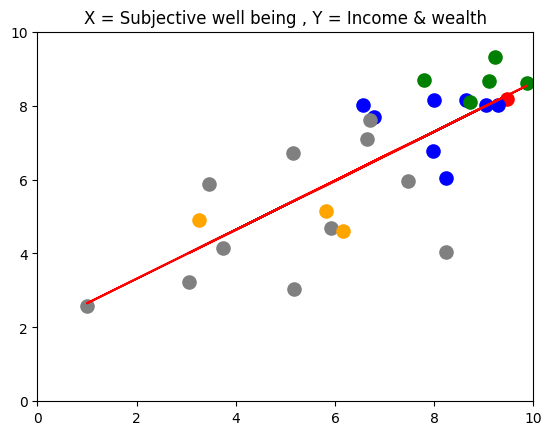


2
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


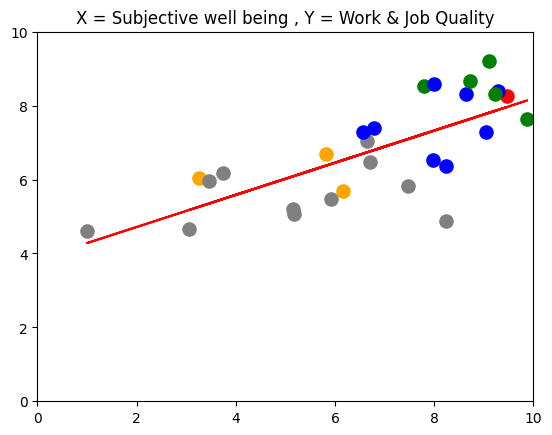


3
11
Not using Israel due to missing values: 11 = 8.232476994729911 & 3 = None
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


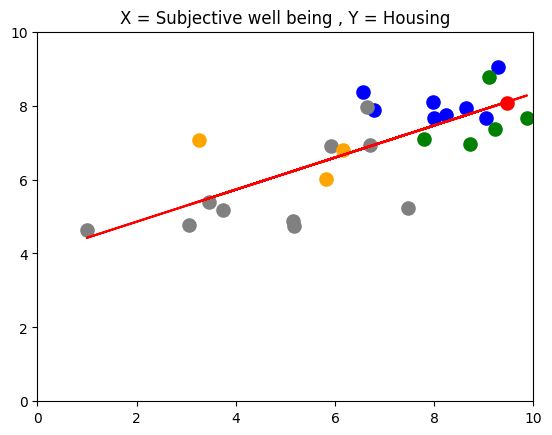


5
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


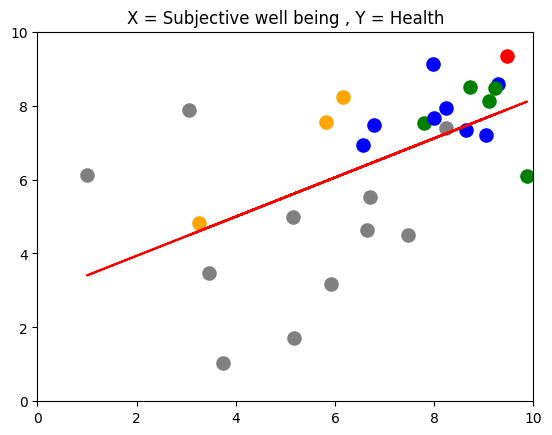


6
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


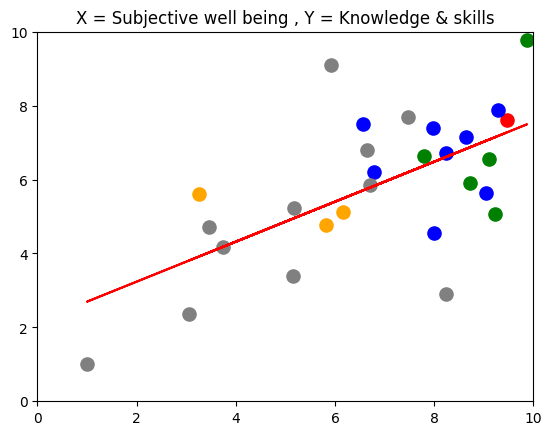


7
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


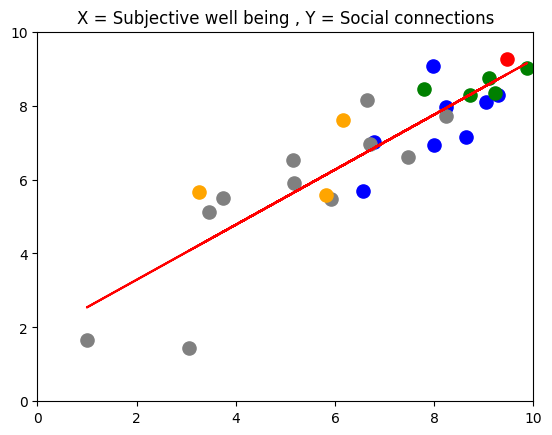


8
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


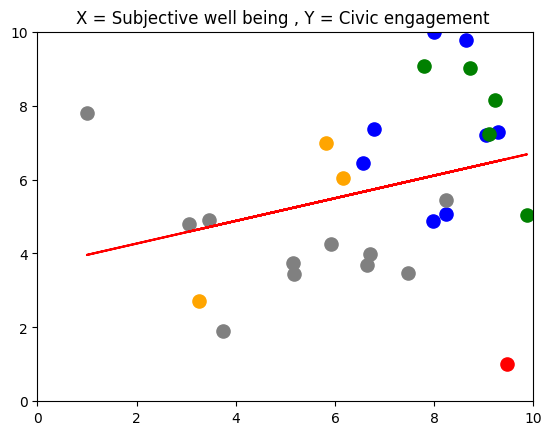


9
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


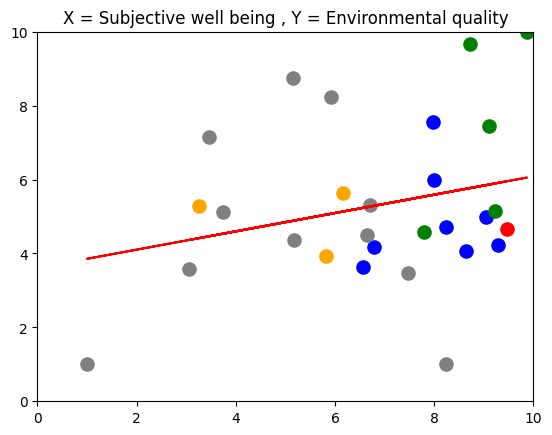


10
11
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


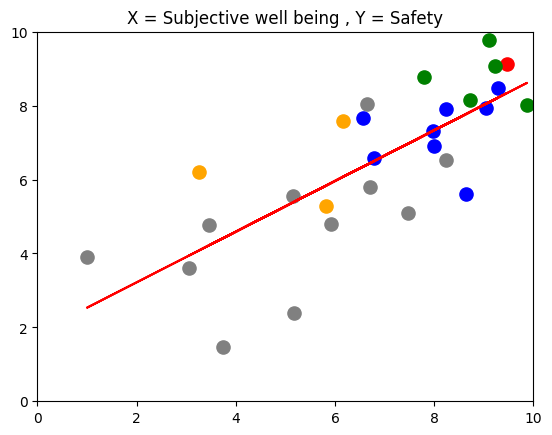


4
11
Not using Israel due to missing values: 11 = 8.232476994729911 & 4 = None
Not using Türkiye due to missing values: 11 = 1.0 & 4 = None
---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


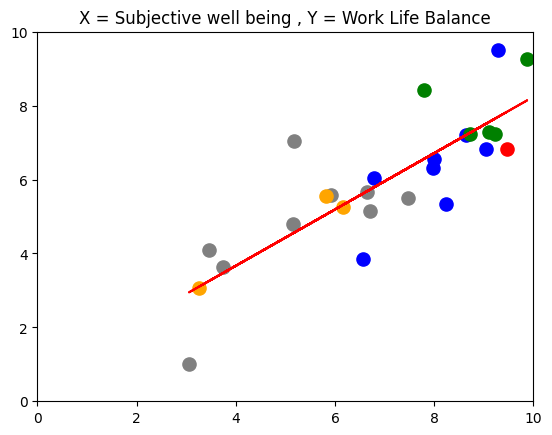

In [264]:
import numpy as np
import statsmodels.api as sm

# correlation combinations of two categories
#corr_combinations = {3:1, 4:1, 6:1, 11:1, 11:2, 11:4}
corr_combinations = {1:11, 2:11, 3:11, 5:11, 6:11, 7:11, 8:11, 9:11, 10:11, 4:11}

countries = set()
country_rankings_all = []

for cat, rankings in all_results.items():
  for each in rankings:
    countries.add(list(each.keys())[0])

for country in countries:
  country_dict = {}
  def add_to_dict(key, value):
    if key not in category_country_result:
      country_dict[key] = value
    else:
      country_dict[key].append(value)

  #print(country)
  for cat, rankings in all_results.items():
    #print(cat)
    value = [item.get(country) for item in all_results.get(cat) if country in item]
    if value:
      add_to_dict(cat, value[0])
      #country_rankings_all.append({country:{cat:value[0]}})
    else:
      add_to_dict(cat, None)
      #country_rankings_all.append({country:{cat:None}})
  country_rankings_all.append({country:country_dict})
"""
# print using dataset for checks
for ctry in country_rankings_all:
  print(ctry)
"""

for corr1_key, corr2_key in corr_combinations.items():
  print(corr1_key)
  print(corr2_key)
  corr1_values = []
  corr2_values = []

  for country in country_rankings_all:
    for ctry, value in country.items():
      corr1_value = value.get(corr1_key)
      corr2_value = value.get(corr2_key)

      if corr1_value and corr2_value:
        corr1_values.append(corr1_value)
        corr2_values.append(corr2_value)
        country_color = get_country_color(ctry)
        if ctry == 'Switzerland':
            plt.scatter(corr2_value, corr1_value, color='red', marker='o', s=90)
        else:
            plt.scatter(corr2_value, corr1_value, color=country_color, marker='o', s=90)

        #plt.scatter(corr2_value, corr1_value, color='blue', marker='o', s=90)
      else:
        print("Not using {} due to missing values: {} = {} & {} = {}".format(ctry, corr2_key, corr2_value, corr1_key, corr1_value))

  #print("X: {}".format(corr2_values))
  #print("Y: {}".format(corr1_values))

  #----------------Linear regression line----------------------
  # Convert to numpy arrays
  x = np.array(corr2_values)
  y = np.array(corr1_values)

  # Perform linear regression
  slope, intercept = np.polyfit(x, y, 1)
  regression_line = slope * x + intercept

  # Overlay linear regression line
  plt.xlim(0, 10)
  plt.ylim(0, 10)
  plt.plot(x, regression_line, color='red', label='Linear Regression')
  #-------------------------------------------------------------

  # Adding title and labels
  plt.title('X = {}, Y = {}'.format(cat_names.get(str(corr2_key)), cat_names.get(str(corr1_key))))

  print("---Color codes---")
  print(get_color_legends())

  # Displaying the plot
  plt.show()
  print("")

We have established a correlation between the category "Subjective well being" with the following other categories:

*   Income & Wealth
*   Work & Job Quality
*   Housing
*   Social connections
*   Safety
*   Work Life Balance

Switzerland ist in most categories really good in comparison with the rest of the european countries. Therefore it is really interesting to look into those categories where Switzerland isn't as good overall in comparison with our peer countries. As often mentioned in political discussions with often like to compare ourselvs with our scandinavian friends. So we will have closer look at the categories where we are less good than them.

1.   Work Life Balance
2.   Work & Job Quality
3.   Income & Wealth



In [283]:
relevant_cat = ['1_1','1_2','1_4','1_5','2_1','2_2','2_3','2_4','2_5','2_7','2_8','2_8_DEP','2_8_VER']

peers = northern_countries + switzerland

all_country_year_values = []

for category in categories:
  category_df = df[df['MEASURE'] == category]
  if category not in relevant_cat:
    continue

  #print("----- {} ------".format(category))

  #-----STEP 0 -------------------------------------------------------------
  # we need to calc the average of all countries and get the min/max values so we can
  # transform the values for each year into the correct transformed "ranking".
  # we need to this step so that the shown values are representative in the same way as
  # already shown graphs and values

  cat_values_min = {}
  cat_values_max = {}
  countries = category_df['Reference area'].unique()


  min_value = category_df['OBS_VALUE'].min()

  max_value = category_df['OBS_VALUE'].max()

  category_rules[category] = {'min': min_value, 'max': max_value}

  min = category_rules[category]["min"]
  max = category_rules[category]["max"]

  #print("CATEGORY: {}".format(category))
  #-----STEP 1 -------------------------------------------------------------
  # collect the values for each year and transform to correct rating with
  # the min/max values we collected in the Step 0
  country_year_values_transformed = {}
  def add_to_dict(key, value):
    if key not in country_year_values_transformed:
      country_year_values_transformed[key] = [value]
    else:
      country_year_values_transformed[key].append(value)

  countries = category_df['Reference area'].unique()
  years = category_df['TIME_PERIOD'].unique()
  # collect means of each country per measurement
  country_list = []
  for country in countries:

    #we only want to collect data from our peers (northern countries)
    if country not in peers:
      continue

    country_dict = {"country":country}
    country_df = category_df.loc[df['Reference area'] == country]
    for year in years:
      year_df = country_df.loc[df['TIME_PERIOD'] == year]
      if not year_df.empty:
        year_value = year_df['OBS_VALUE'].iloc[0]
        #print("Before: {}: {} - min: {} & max: {}".format(year, year_value, min, max))
        transformed_value = None

        if category in categories_reverse_ranking:
          transformed_value = (year_value-max)/(min-max)*9+1
          #print("{} - Transformed to ranking: {}: {}".format(country, year, transformed_value))
        else:
          transformed_value = (year_value-min)/(max-min)*9+1
          #print("{} - Transformed to ranking: {}: {}".format(country, year, transformed_value))

        country_dict.update({year:transformed_value})
      #print("--")
    add_to_dict(category, country_dict)

  all_country_year_values.append(country_year_values_transformed)
  #print("----------")

for cvyv in all_country_year_values:
  print(cvyv)


{'1_1': [{'country': 'Finland', 2007: 5.223285585557592, 2008: 5.367026069664108, 2009: 5.393592890656558, 2010: 5.550476959885653, 2011: 5.573128670416058, 2012: 5.532020010564584, 2013: 5.496504365658889, 2014: 5.426591678836653, 2015: 5.490911350713109, 2016: 5.6201099959606005, 2017: 5.682192461858746, 2018: 5.82089923251406, 2019: 5.987571077898269, 2020: 5.9998757107789835, 2021: 6.110337755958114}, {'country': 'Switzerland', 2007: 7.340801044029457, 2008: 7.358698691855948, 2009: 7.419103253270361, 2010: 7.513904856601311, 2011: 7.539632725351894, 2012: 7.692042382624367, 2013: 7.851722959326353, 2014: 7.900661840101917, 2015: 7.956591989559706, 2016: 8.000776807631357, 2017: 7.861790386228754, 2018: 7.853680514557375, 2019: 7.988751825497934, 2020: 8.251623527949539, 2021: 8.336357704378088}, {'country': 'Norway', 2007: 5.601932697386819, 2008: 5.740919118789423, 2009: 5.977224000248579, 2010: 6.099151726066557, 2011: 6.28036541030979, 2012: 6.496535437964143, 2013: 6.676071217

searching for Norway
{2007: 7.727596783476018, 2008: 8.151031410132138, 2009: 8.284822304409971, 2010: 8.310046083690551, 2011: 8.288664722142665, 2012: 8.262163750795384, 2013: 8.345933565300477, 2014: 8.336809340334959, 2015: 8.308338964062854, 2016: 8.340190202615073, 2017: 8.279579582421992, 2018: 8.263124833661845, 2019: 8.263697053805075, 2020: 8.269696626223134, 2021: 7.820674890470124}
searching for Finland
{2007: 7.90716650508505, 2008: 7.912816300024723, 2009: 8.124199853098922, 2010: 8.145363805188804, 2011: 8.090741406734448, 2012: 8.284635437423756, 2013: 8.146870656632112, 2014: 8.204107158839598, 2015: 8.307415337678277, 2016: 8.417772064207542, 2017: 8.31940681111686, 2018: 8.297425895085038, 2019: 8.344922660778915, 2020: 8.530770558129529, 2021: 8.345899656380833}
searching for Denmark
{2007: 7.266961467977287, 2008: 7.173393595592596, 2009: 7.173330712170483, 2010: 7.313104981160726, 2011: 8.272228835876085, 2012: 8.328747902197218, 2013: 8.261185482326614, 2014: 8.2

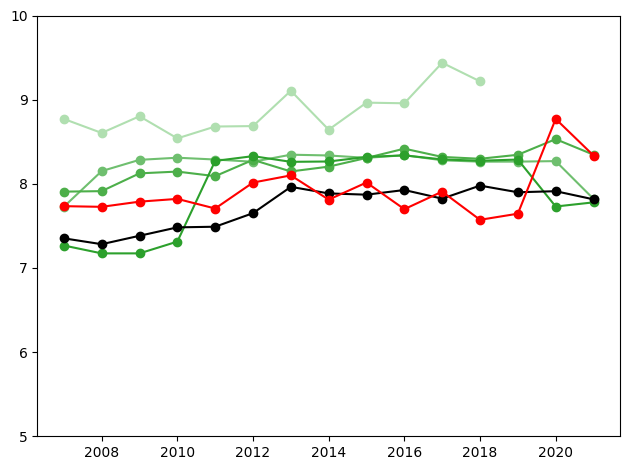

-----
searching for Norway
{2007: 8.77709641505508, 2008: 8.842931531317696, 2009: 8.812128029856485, 2010: 8.845853597757353, 2011: 8.851868334380475, 2012: 8.933733391238643, 2013: 8.882481821669526, 2014: 8.90768396028103, 2015: 8.801650792828141, 2016: 8.769663359735192, 2017: 8.749018816718644, 2018: 8.816418109958626, 2019: 8.94549514315136, 2020: 8.889588581795097, 2021: 8.904325810434988}
searching for Finland
{2007: 7.639412890774164, 2008: 7.66686420388796, 2009: 7.602093199000611, 2010: 7.624366622564791, 2011: 7.625698490499897, 2012: 7.6645135579565205, 2013: 7.563662450603412, 2014: 7.591897578909104, 2015: 7.609591488843326, 2016: 7.769269993565116, 2017: 7.484538748903674, 2018: 7.583780203965447, 2019: 7.683436615409566, 2020: 7.822546344524011, 2021: 8.227256155881795}
searching for Denmark
{2007: 8.522599084776054, 2008: 8.501318918462204, 2009: 8.372046859242346, 2010: 8.214546189536742, 2011: 8.218191023796944, 2012: 8.210951627986391, 2013: 8.25352327633311, 2014:

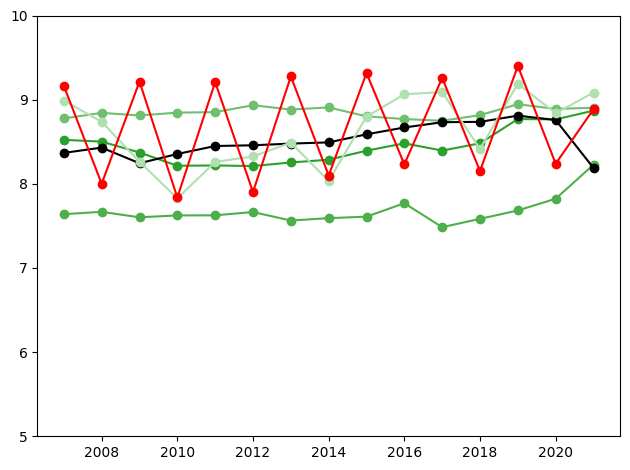

-----
1
{'Norway': {2007: 7.727596783476018, 2008: 8.151031410132138, 2009: 8.284822304409971, 2010: 8.310046083690551, 2011: 8.288664722142665, 2012: 8.262163750795384, 2013: 8.345933565300477, 2014: 8.336809340334959, 2015: 8.308338964062854, 2016: 8.340190202615073, 2017: 8.279579582421992, 2018: 8.263124833661845, 2019: 8.263697053805075, 2020: 8.269696626223134, 2021: 7.820674890470124}, 'Finland': {2007: 7.90716650508505, 2008: 7.912816300024723, 2009: 8.124199853098922, 2010: 8.145363805188804, 2011: 8.090741406734448, 2012: 8.284635437423756, 2013: 8.146870656632112, 2014: 8.204107158839598, 2015: 8.307415337678277, 2016: 8.417772064207542, 2017: 8.31940681111686, 2018: 8.297425895085038, 2019: 8.344922660778915, 2020: 8.530770558129529, 2021: 8.345899656380833}, 'Denmark': {2007: 7.266961467977287, 2008: 7.173393595592596, 2009: 7.173330712170483, 2010: 7.313104981160726, 2011: 8.272228835876085, 2012: 8.328747902197218, 2013: 8.261185482326614, 2014: 8.265201733142261, 2015: 

In [280]:
import re

cats = ['1','2']
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

def get_graph_colors(country):
  if country == "Switzerland":
    return 'red'
  elif country == "Finland":
    return "#4daf4a"
  elif country == "Denmark":
    return "#2ca02c"
  elif country == "Norway":
    return "#6fbf6f"
  elif country == "Iceland":
    return "#b0dfb0"
  else:
    return "black"

global_country_means_dict = {}

for nbr in cats:
  category_country_year_means = {}
  for country in peers:
    print("searching for {}".format(country))
    country_year_values = [] #for testing
    country_year_means = {}
    for year in years:
      year_values = []
      for item in all_country_year_values:

        for key in item.keys():

          if key.startswith("{}_".format(nbr)):
            dicts = (item[key])

            next((year_values.append(item.get(year)) for i, item in enumerate(dicts) if item["country"] == country and item.get(year) is not None), None)
      country_year_values.append({year:year_values})
      country_year_means.update({year:np.mean(year_values)})


    print(country_year_means)

    # Extract years and values
    years = list(country_year_means.keys())
    values = list(country_year_means.values())

    #add to global list - could be interesting for further steps
    category_country_year_means.update({country:country_year_means})


    country_color = get_graph_colors(country)
    if country == 'Switzerland':
      plt.plot(years, values, marker='o', linestyle='-', color=country_color, label=country)
    else:
      plt.plot(years, values, marker='o', linestyle='-', color=country_color, label=country)
    plt.tight_layout()
    plt.ylim(5,10)

  plt.show()
  print("-----")
  global_country_means_dict.update({nbr:category_country_year_means})

for topic, values in global_country_means_dict.items():
  print(topic)
  print(values)



**Step 4 – Presenting information:**  

This is about communicating the information extracted. the focus here is on getting the right information, in the right format, to the right people, at the right time.

**4.1 Decide what type of report (frequency, outlet, and how to show the data)**

**4.2 Starting with the question**

**4.3 Using headlines**

**4.4 Using effective visuals**

**4.5 Using narratives to support visuals**

**4.6 Getting the most out of self-service tools**